<a href="https://colab.research.google.com/github/RAvila-bioeng/Cell-Count/blob/main/Cell_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cell count
Authors: Nacho Cañas and Roberto Ávila


Justificación teórica (por qué eliges ciertos métodos, parámetros, filtros, etc.).

Código limpio (sin errores, con comentarios y funciones si puedes).

Resultados y conclusiones (mostrar imágenes procesadas y número de células detectadas).

### Código de Primer día:

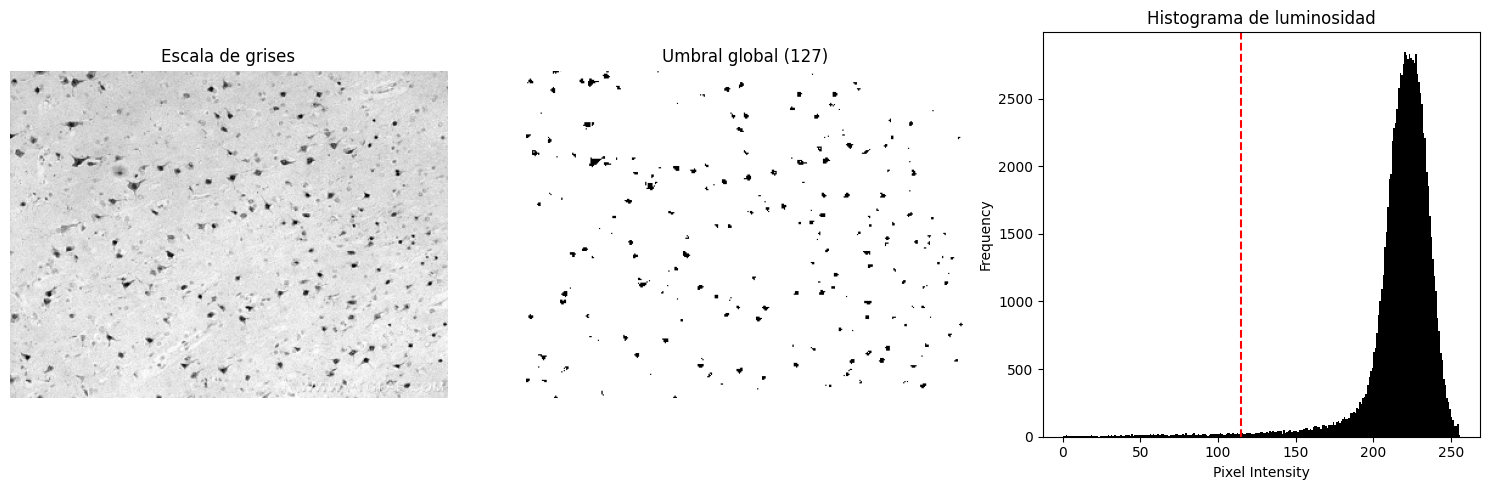

In [7]:
import cv2

# Convertimos a escala de grises para poder umbralizar de manera global. Solo nos falta elegir un valor de umbral.
gray = cv2.cvtColor(image1antigenandcell, cv2.COLOR_BGR2GRAY)

# Umbral global Ej: valor fijo = 70 de 255 como máx
limite = 115
 # así es más rápido cambiarlo si es necesario
_, th_global = cv2.threshold(gray, limite, 255, cv2.THRESH_BINARY)
# Mostrar resultados
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Primero imprimimos la imagen en gris
axs[0].imshow(gray, cmap="gray")
axs[0].set_title("Escala de grises")
axs[0].axis("off")

# Segundo la linarización global
axs[1].imshow(th_global, cmap="gray")
axs[1].set_title("Umbral global (127)")
axs[1].axis("off")


# Y para hacerlo más visual el histograma de la imagen en gris
axs[2].hist(gray.ravel(), bins=256, range=[0,256], color="black")
axs[2].set_title("Histograma de luminosidad")
axs[2].axvline(limite, color="red", linestyle="--")  # línea en el umbral
axs[2].set_xlabel("Pixel Intensity") # Added x-axis label
axs[2].set_ylabel("Frequency") # Added y-axis label

plt.tight_layout()
plt.show()

Se detectaron 219 manchas en total.


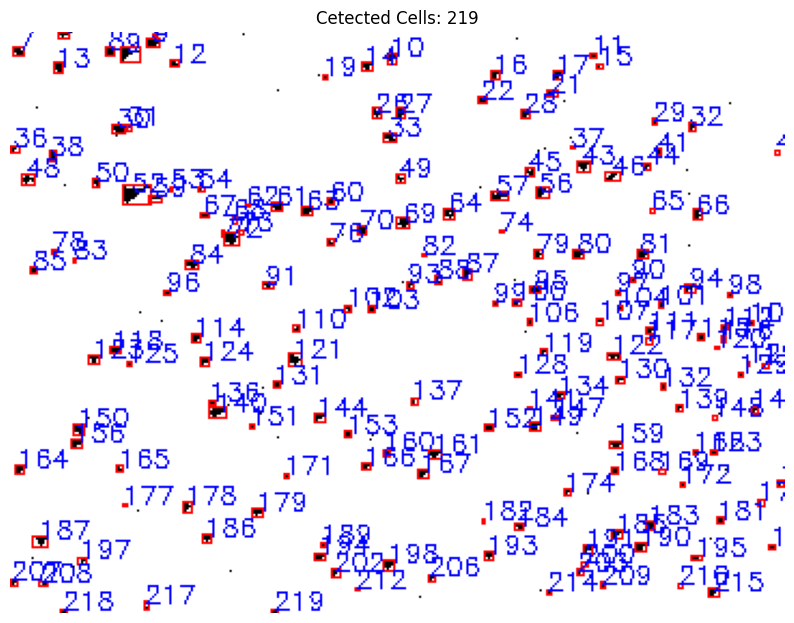

In [8]:
# --- NUEVO BLOQUE: detección y etiquetado de manchas negras ---

# Invertimos la imagen binaria si es necesario (queremos manchas en blanco sobre fondo negro)
# Esto depende de cómo se generó tu umbral, si ya están en negro puedes quitar esta línea.
th_invertida = cv2.bitwise_not(th_global)

# Detectar componentes conectados (cada mancha individual)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(th_invertida, connectivity=8)

# Crear una copia en color para visualizar los resultados
output = cv2.cvtColor(th_global, cv2.COLOR_GRAY2BGR)

# Dibujar rectángulos y números sobre cada mancha
for i in range(1, num_labels):  # el 0 es el fondo
    x, y, w, h, area = stats[i]
    cx, cy = centroids[i]
    # Filtrar manchas muy pequeñas (opcional, ej. ruido)
    if area > 1:
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), 1)
        cv2.putText(output, str(i), (int(cx), int(cy)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

print(f"Se detectaron {num_labels - 1} manchas en total.")

# Mostrar resultado
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title(f"Cetected Cells: {num_labels - 1}")
plt.axis("off")
plt.show()

In [9]:
# Extraemos la información de los detalles de la imagen en tuplas:
ancho, alto, capas = image1antigenandcell.shape
print('Ancho: '+str(ancho))
print('Alto: '+str(alto))
print('Capas: '+str(capas))
#Como podemos ver tiene 3 capas

Ancho: 270
Alto: 360
Capas: 3


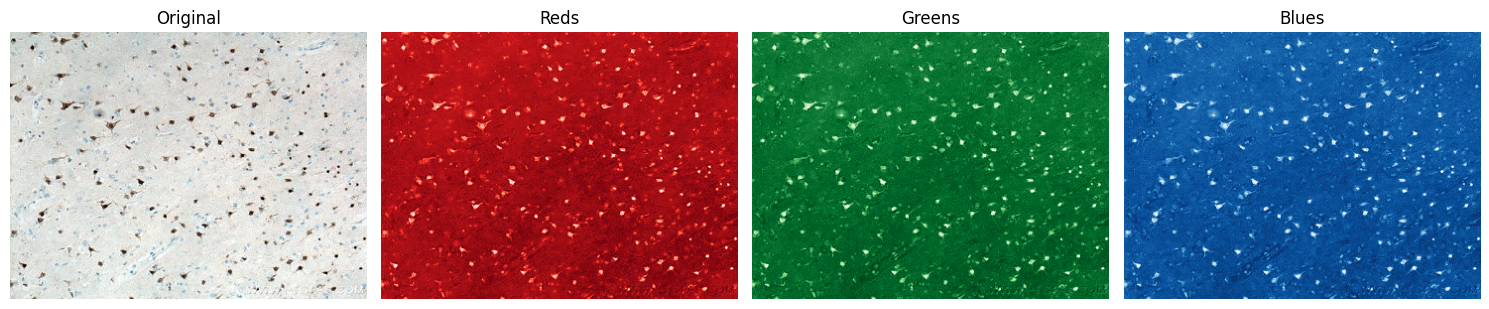

In [11]:

fig, axs = plt.subplots(1, capas + 1, figsize=(15, 5))



axs[0].imshow(image1antigenandcell)
axs[0].set_title("Original")
axs[0].axis("off")

colores=["Reds", "Greens", "Blues"]
for i in range(capas):
    axs[i+1].imshow(image1antigenandcell[:, :, i], cmap=colores[i])
    axs[i+1].set_title(colores[i])
    axs[i+1].axis("off")

plt.tight_layout() #esta linea solo hace que se ajuste a la página
plt.show()

In [30]:
# Calculate the average intensity for each channel
red_avg = np.mean(image1antigenandcell[:, :, 0])
green_avg = np.mean(image1antigenandcell[:, :, 1])
blue_avg = np.mean(image1antigenandcell[:, :, 2])

print(f"Average intensity of the Red channel: {red_avg:.2f}")
print(f"Average intensity of the Green channel: {green_avg:.2f}")
print(f"Average intensity of the Blue channel: {blue_avg:.2f}")

# You can also compare them directly
print(f"\nComparison of average intensities:")
print(f"Red vs Green: {red_avg/green_avg:.2f} times Red intensity compared to Green")
print(f"Red vs Blue: {red_avg/blue_avg:.2f} times Red intensity compared to Blue")
print(f"Green vs Blue: {green_avg/blue_avg:.2f} times Green intensity compared to Blue")

Average intensity of the Red channel: 217.17
Average intensity of the Green channel: 217.75
Average intensity of the Blue channel: 213.79

Comparison of average intensities:
Red vs Green: 1.00 times Red intensity compared to Green
Red vs Blue: 1.02 times Red intensity compared to Blue
Green vs Blue: 1.02 times Green intensity compared to Blue


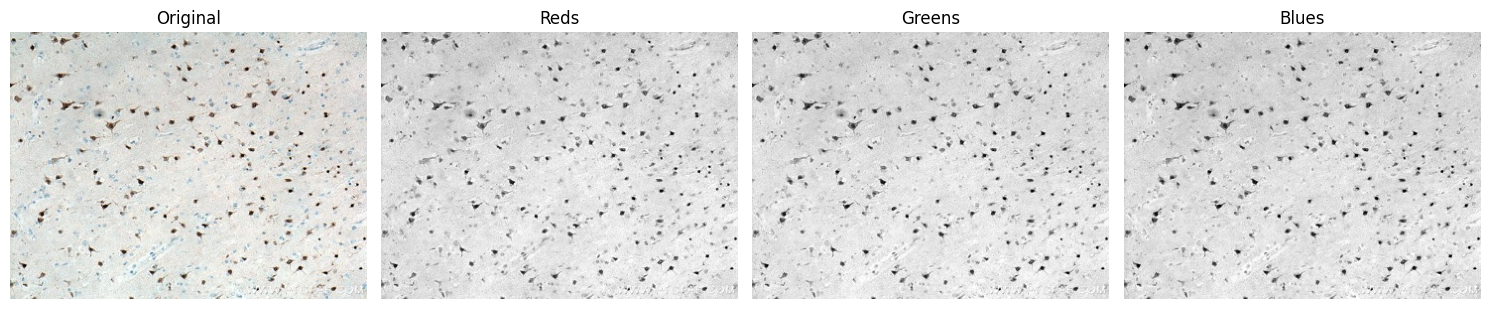

In [32]:
  #En escala de grises
fig, axs = plt.subplots(1, capas + 1, figsize=(15, 5))  # 1 fila, 'capas' columnas



axs[0].imshow(image1antigenandcell)
axs[0].set_title("Original")
axs[0].axis("off")

colores=["Reds", "Greens", "Blues"]
for i in range(capas):
    axs[i+1].imshow(image1antigenandcell[:, :, i], cmap="grey")
    axs[i+1].set_title(colores[i])
    axs[i+1].axis("off")

plt.tight_layout() #esta linea solo hace que se ajuste a la página
plt.show()

#vemos claramente que sí que hay diferencia

### Código Segundo día

In [1]:
!pip install onedrivedownloader
from onedrivedownloader import download

PATH_FILE = 'https://universidadfv-my.sharepoint.com/:i:/g/personal/alberto_desantos_ufv_es/ESWcU3soWRFFhKUIBOoH2uUBZq6M5T5jrYA-cYK1YprwJg?e=LBz2yk'
download(url = PATH_FILE, filename = 'image1antigenandcell.jpg', unzip=False, force_download=True, clean=False)

100%|██████████| 46.8k/46.8k [00:00<00:00, 380kiB/s]


'image1antigenandcell.jpg'

In [2]:
PATH_FILE = 'https://universidadfv-my.sharepoint.com/:i:/g/personal/alberto_desantos_ufv_es/EVq7WDpsmUdNpimem9qtc-0Btj8E9McUzg9IccKZN2f-rg?e=tNV0Dz'
download(url = PATH_FILE, filename = 'image2cell.jpg', unzip=False, force_download=True, clean=False)

100%|██████████| 336k/336k [00:00<00:00, 641kiB/s]


'image2cell.jpg'

In [3]:
pip install --upgrade scikit-image

In [4]:
import os
import shutil

import matplotlib.pyplot as plt
# https://nipy.org/nibabel/gettingstarted.html
import nibabel as nib
import numpy as np
from PIL import Image, ImageDraw
from scipy.spatial import ConvexHull
from skimage import measure

import glob
import csv

/tmp/ipython-input-1823758887.py:11: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


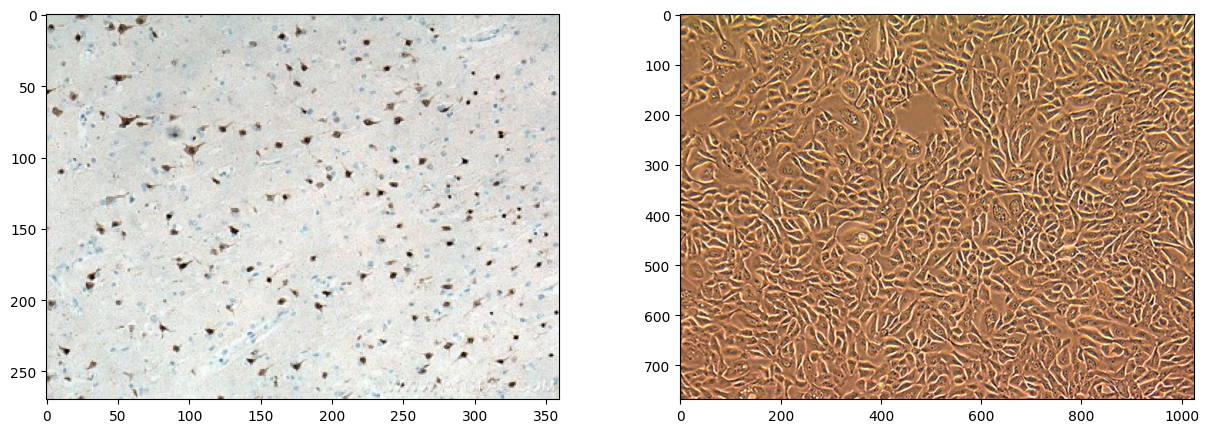

In [6]:
from skimage import io

# Cargar una imagen
image1antigenandcell = io.imread('/content/image1antigenandcell.jpg')
image2cell = io.imread('/content/image2cell.jpg')
# Mostrar la imagen
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(image1antigenandcell)
axs[1].imshow(image2cell)

io.show()

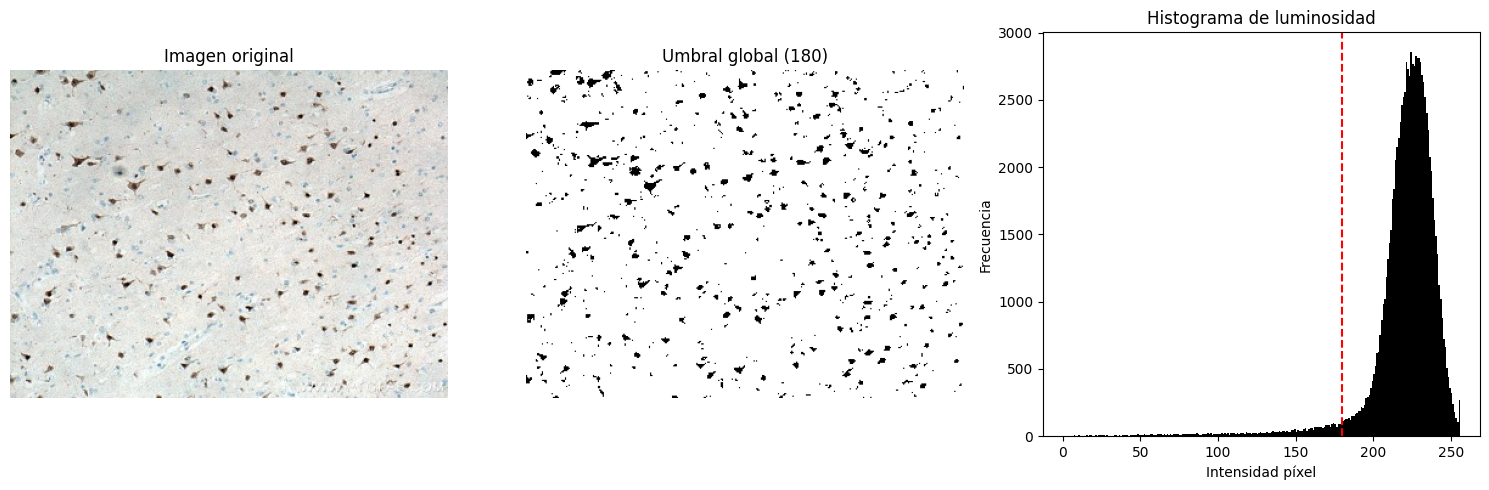

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convertir la imagen a espacio de color HSV
hsv_img = cv2.cvtColor(image1antigenandcell, cv2.COLOR_RGB2HSV)

v_channel = hsv_img[:, :, 2]  # canal de luminosidad
limite = 180
_, th_global = cv2.threshold(v_channel, limite, 255, cv2.THRESH_BINARY)

# Mostrar
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image1antigenandcell)  # Imagen en color
axs[0].set_title("Imagen original")
axs[0].axis("off")

axs[1].imshow(th_global, cmap='gray')
axs[1].set_title(f"Umbral global ({limite})")
axs[1].axis("off")

axs[2].hist(v_channel.ravel(), bins=256, range=[0,256], color="black")
axs[2].axvline(limite, color="red", linestyle="--")
axs[2].set_title("Histograma de luminosidad")
axs[2].set_xlabel("Intensidad píxel")
axs[2].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Se detectaron 648 manchas en total.


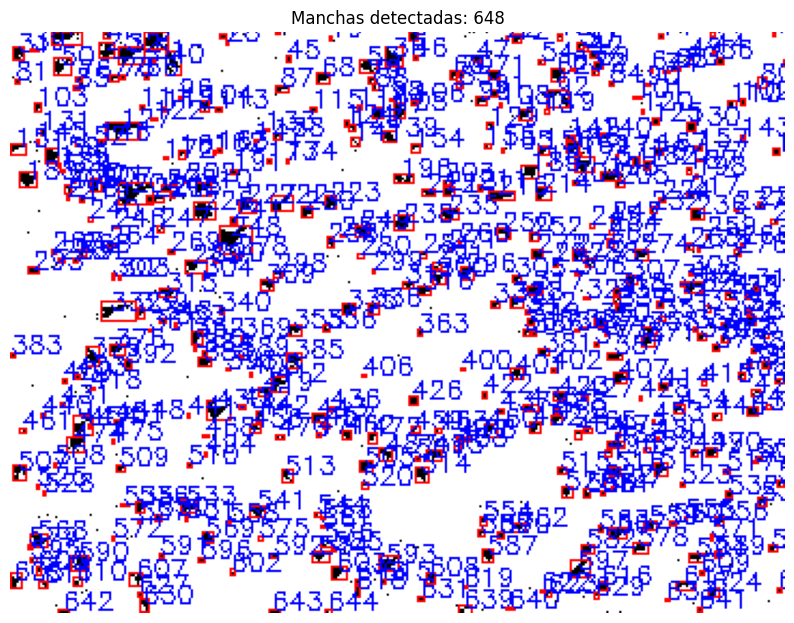

In [34]:
# Invertimos la imagen binaria si es necesario (queremos manchas en blanco sobre fondo negro)
# Esto depende de cómo se generó tu umbral, si ya están en negro puedes quitar esta línea.
th_invertida = cv2.bitwise_not(th_global)

# Detectar componentes conectados (cada mancha individual)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(th_invertida, connectivity=8)

# Crear una copia en color para visualizar los resultados
output = cv2.cvtColor(th_global, cv2.COLOR_GRAY2BGR)

# Dibujar rectángulos y números sobre cada mancha
for i in range(1, num_labels):  # el 0 es el fondo
    x, y, w, h, area = stats[i]
    cx, cy = centroids[i]
    # Filtrar manchas muy pequeñas (opcional, ej. ruido)
    if area > 1:
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), 1)
        cv2.putText(output, str(i), (int(cx), int(cy)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

print(f"Se detectaron {num_labels - 1} manchas en total.")

# Mostrar resultado
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title(f"Manchas detectadas: {num_labels - 1}")
plt.axis("off")
plt.show()


Se detectaron 543 manchas con umbral adaptativo y morfología.


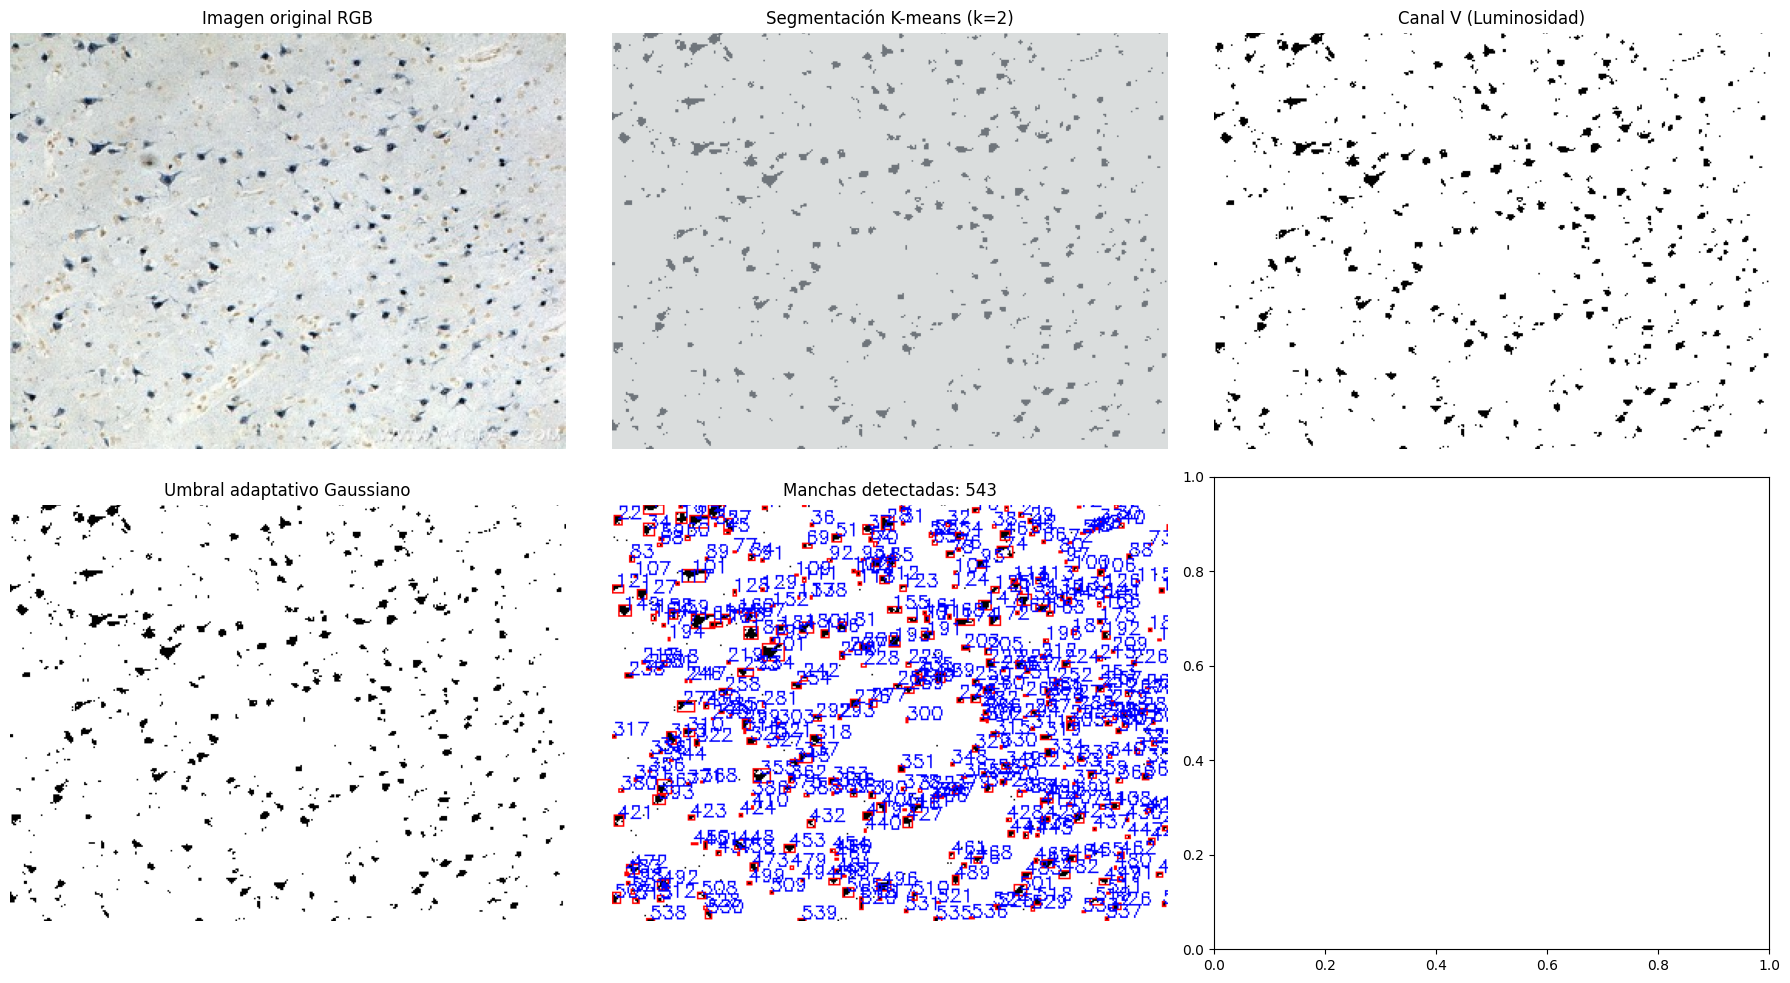

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Paso 1: Segmentación previa con K-Means clustering ---
img_rgb = cv2.cvtColor(image1antigenandcell, cv2.COLOR_BGR2RGB)
pixel_vals = img_rgb.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2  # ajustar según necesidad
_, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(img_rgb.shape)

# --- Paso 2: Convertir segmentada a HSV y extraer canal V (luminosidad) ---
segmented_bgr = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)
hsv_img = cv2.cvtColor(segmented_bgr, cv2.COLOR_BGR2HSV)
v_channel = hsv_img[:, :, 2]

# --- Paso 3: Umbral adaptativo (Gaussiano) en canal V ---
# cv2.adaptiveThreshold requiere imagen 8 bits en escala de grises
th_adapt = cv2.adaptiveThreshold(v_channel, 255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY,
                                 11, 2)  # puedes ajustar el tamaño de bloque y C


# --- Paso 5: Invertir imagen para detección ---
th_invertida = cv2.bitwise_not(th_adapt)

# --- Paso 6: Detección y etiquetado de manchas ---
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(th_invertida, connectivity=8)
output = cv2.cvtColor(th_adapt, cv2.COLOR_GRAY2BGR)

for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    cx, cy = centroids[i]
    if area > 1:  # filtro mínimo tamaño manchas
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), 1)
        cv2.putText(output, str(i), (int(cx), int(cy)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

print(f"Se detectaron {num_labels - 1} manchas con umbral adaptativo y morfología.")

# --- Visualización ---
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Imagen original
axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title("Imagen original RGB")
axs[0, 0].axis("off")

# Imagen segmentada por clusters
axs[0, 1].imshow(segmented_image)
axs[0, 1].set_title(f"Segmentación K-means (k={k})")
axs[0, 1].axis("off")

# Canal V
axs[0, 2].imshow(v_channel, cmap='gray')
axs[0, 2].set_title("Canal V (Luminosidad)")
axs[0, 2].axis("off")

# Umbral adaptativo
axs[1, 0].imshow(th_adapt, cmap='gray')
axs[1, 0].set_title("Umbral adaptativo Gaussiano")
axs[1, 0].axis("off")


# Manchas detectadas y etiquetadas
axs[1, 1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title(f"Manchas detectadas: {num_labels - 1}")
axs[1, 1].axis("off")

plt.tight_layout()
plt.show()


Se detectaron 595 manchas con umbral adaptativo y morfología.


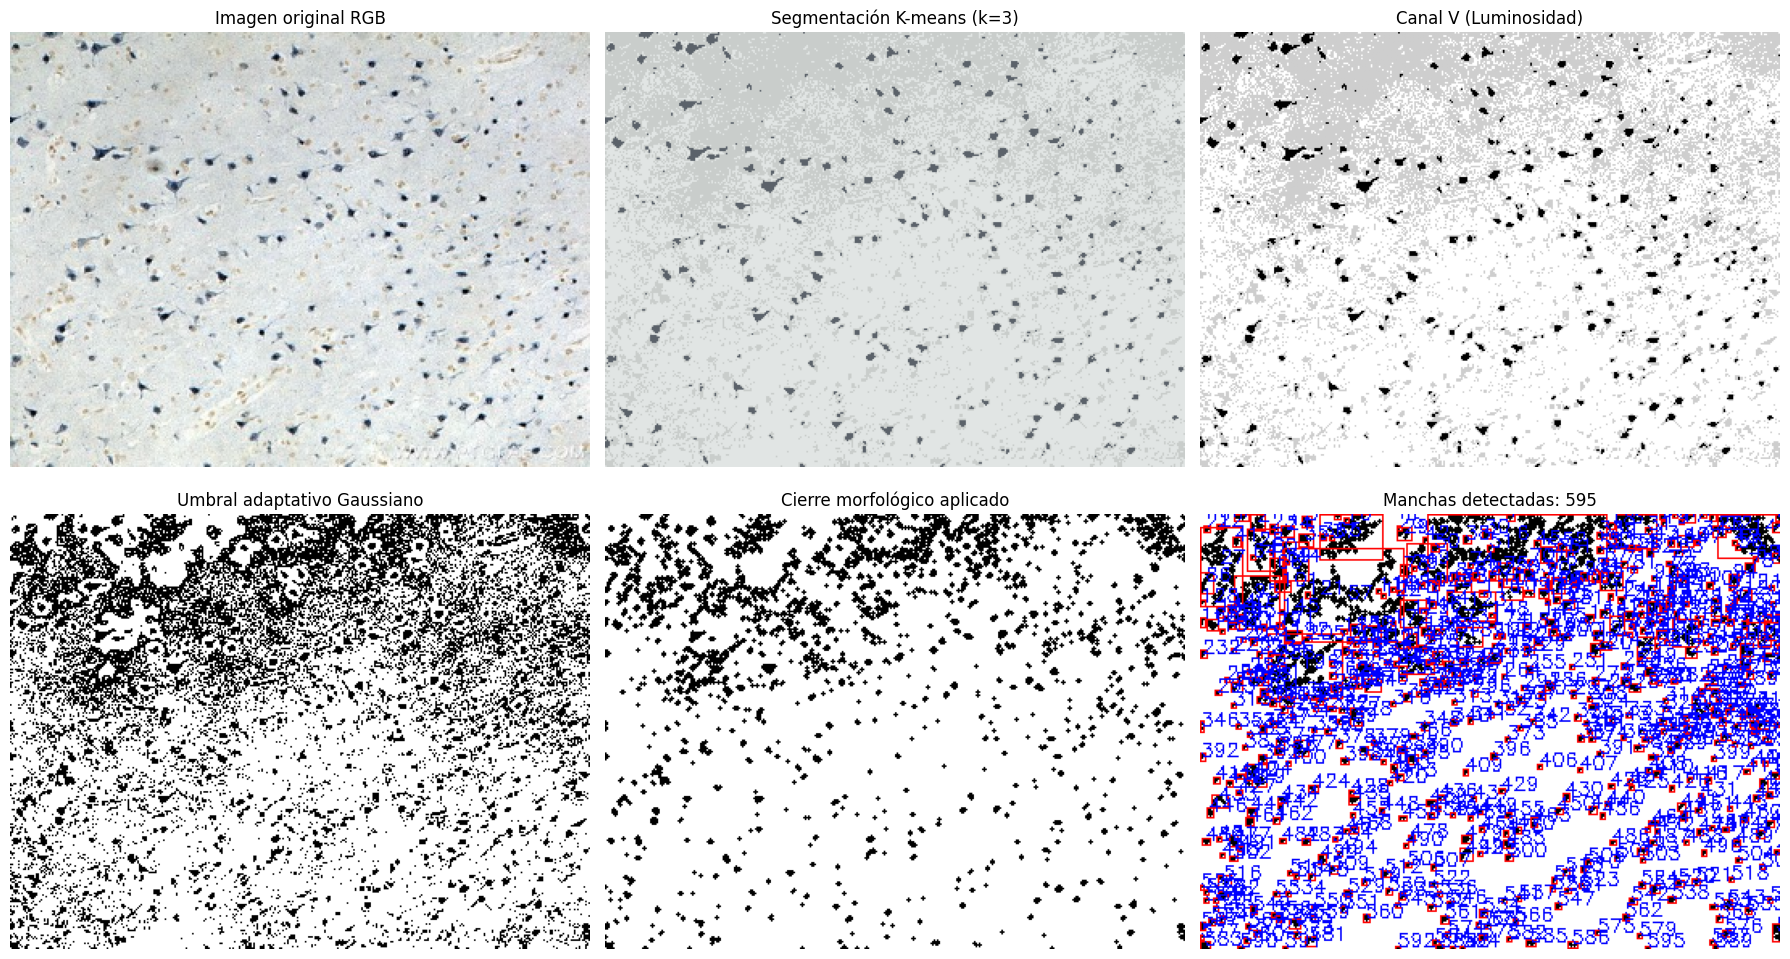

In [ ]:
# scikitimage, mucho mejor para los metodos sauvola y otro niblack

import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Paso 1: Segmentación previa con K-Means clustering ---
img_rgb = cv2.cvtColor(image1antigenandcell, cv2.COLOR_BGR2RGB)
pixel_vals = img_rgb.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # ajustar según necesidad
_, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(img_rgb.shape)

# --- Paso 2: Convertir segmentada a HSV y extraer canal V (luminosidad) ---
segmented_bgr = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)
hsv_img = cv2.cvtColor(segmented_bgr, cv2.COLOR_BGR2HSV)
v_channel = hsv_img[:, :, 2]

# --- Paso 3: Umbral adaptativo (Gaussiano) en canal V ---
# cv2.adaptiveThreshold requiere imagen 8 bits en escala de grises
th_adapt = cv2.adaptiveThreshold(v_channel, 255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY,
                                 11, 2)  # puedes ajustar el tamaño de bloque y C

# --- Paso 4: Morfología para mejorar regiones ---
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
th_morph = cv2.morphologyEx(th_adapt, cv2.MORPH_CLOSE, kernel, iterations=1)

# --- Paso 5: Invertir imagen para detección ---
th_invertida = cv2.bitwise_not(th_morph)

# --- Paso 6: Detección y etiquetado de manchas ---
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(th_invertida, connectivity=8)
output = cv2.cvtColor(th_morph, cv2.COLOR_GRAY2BGR)

for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    cx, cy = centroids[i]
    if area > 1:  # filtro mínimo tamaño manchas
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), 1)
        cv2.putText(output, str(i), (int(cx), int(cy)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

print(f"Se detectaron {num_labels - 1} manchas con umbral adaptativo y morfología.")

# --- Visualización ---
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Imagen original
axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title("Imagen original RGB")
axs[0, 0].axis("off")

# Imagen segmentada por clusters
axs[0, 1].imshow(segmented_image)
axs[0, 1].set_title(f"Segmentación K-means (k={k})")
axs[0, 1].axis("off")

# Canal V
axs[0, 2].imshow(v_channel, cmap='gray')
axs[0, 2].set_title("Canal V (Luminosidad)")
axs[0, 2].axis("off")

# Umbral adaptativo
axs[1, 0].imshow(th_adapt, cmap='gray')
axs[1, 0].set_title("Umbral adaptativo Gaussiano")
axs[1, 0].axis("off")

# Morfología aplicada
axs[1, 1].imshow(th_morph, cmap='gray')
axs[1, 1].set_title("Cierre morfológico aplicado")
axs[1, 1].axis("off")

# Manchas detectadas y etiquetadas
axs[1, 2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title(f"Manchas detectadas: {num_labels - 1}")
axs[1, 2].axis("off")

plt.tight_layout()
plt.show()


In [35]:
# Extraemos la información de los detalles de la imagen en tuplas:
ancho, alto, capas = image1antigenandcell.shape
print('Ancho: '+str(ancho))
print('Alto: '+str(alto))
print('Capas: '+str(capas))
#Como podemos ver tiene 3 capas

Ancho: 270
Alto: 360
Capas: 3


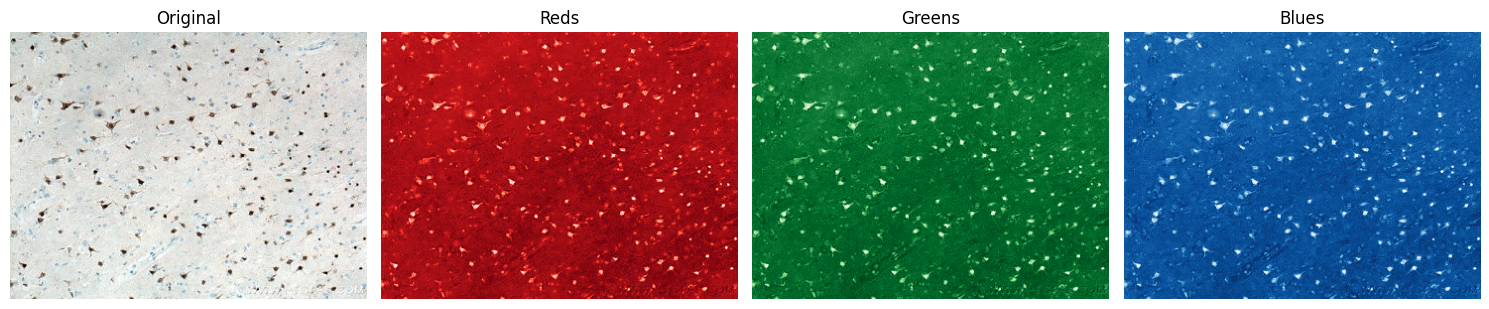

In [36]:
fig, axs = plt.subplots(1, capas + 1, figsize=(15, 5))



axs[0].imshow(image1antigenandcell)
axs[0].set_title("Original")
axs[0].axis("off")

colores=["Reds", "Greens", "Blues"]
for i in range(capas):
    axs[i+1].imshow(image1antigenandcell[:, :, i], cmap=colores[i])
    axs[i+1].set_title(colores[i])
    axs[i+1].axis("off")

plt.tight_layout() #esta linea solo hace que se ajuste a la página
plt.show()

In [37]:
# Calculate the average intensity for each channel
red_avg = np.mean(image1antigenandcell[:, :, 0])
green_avg = np.mean(image1antigenandcell[:, :, 1])
blue_avg = np.mean(image1antigenandcell[:, :, 2])

print(f"Average intensity of the Red channel: {red_avg:.2f}")
print(f"Average intensity of the Green channel: {green_avg:.2f}")
print(f"Average intensity of the Blue channel: {blue_avg:.2f}")

# You can also compare them directly
print(f"\nComparison of average intensities:")
print(f"Red vs Green: {red_avg/green_avg:.2f} times Red intensity compared to Green")
print(f"Red vs Blue: {red_avg/blue_avg:.2f} times Red intensity compared to Blue")
print(f"Green vs Blue: {green_avg/blue_avg:.2f} times Green intensity compared to Blue")

Average intensity of the Red channel: 217.17
Average intensity of the Green channel: 217.75
Average intensity of the Blue channel: 213.79

Comparison of average intensities:
Red vs Green: 1.00 times Red intensity compared to Green
Red vs Blue: 1.02 times Red intensity compared to Blue
Green vs Blue: 1.02 times Green intensity compared to Blue


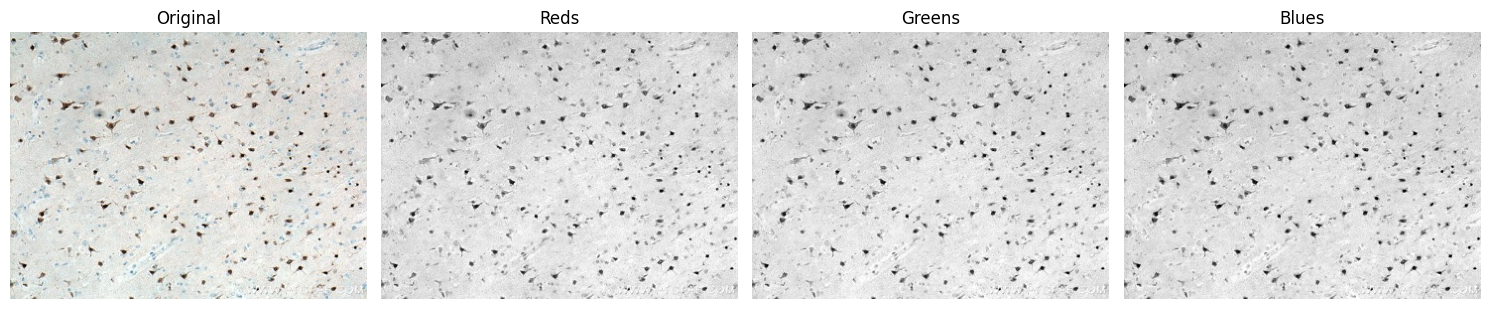

In [38]:
#En escala de grises
fig, axs = plt.subplots(1, capas + 1, figsize=(15, 5))  # 1 fila, 'capas' columnas



axs[0].imshow(image1antigenandcell)
axs[0].set_title("Original")
axs[0].axis("off")

colores=["Reds", "Greens", "Blues"]
for i in range(capas):
  axs[i+1].imshow(image1antigenandcell[:, :, i], cmap="grey")
  axs[i+1].set_title(colores[i])
  axs[i+1].axis("off")

plt.tight_layout() #esta linea solo hace que se ajuste a la página
plt.show()

#vemos claramente que sí que hay diferencia
